In [1]:
import pandas as pd

df = pd.read_csv('./tes_companies.csv')
print(df.shape)
df.dropna(subset=['출원인'], inplace=True)
df['출원인'] = df['출원인'].str.lower()

(11395, 69)


In [20]:
new_df = df.loc[df['출원인'].apply(lambda x : '|' in x)].copy()
new_df['companies_lst'] = new_df['출원인'].apply(lambda x: list(sorted(set(x.split('|')))))
companies_unique_lst = new_df.explode('companies_lst')['companies_lst'].value_counts().index
new_df=new_df.explode('companies_lst')


In [3]:
# 회사명 통일성 확보
df['companies'] = df['출원인'].apply(lambda x: list(sorted(set(x.split('|')))))

# Create separate rows for each combination
df_expanded = df.explode('companies')

In [4]:
def remove_stopwords(word):
    word = word.replace('corporation','')
    word = word.replace('corp','')
    word = word.replace('company','')                                       
    word = word.replace('central','')
    word = word.replace('r&d','')
    word = word.replace('labs','')
    word = word.replace('industries','')
    word = word.replace('inc','')
    word = word.replace('llc','')
    word = word.replace('limited','')
    word = word.replace('co','')
    word = word.replace('ltd','')
    word = word.replace('.','')
    word = word.replace(',','')
    word = word.replace(' ','')
    return word
    

In [5]:
len(df_expanded['companies'].unique())

3733

In [6]:
for i in df_expanded['companies'].value_counts().index:
    print(i)

siemens aktiengesellschaft
denso corp
toyota central r&d labs inc
toyota industries corp
valeo systemes thermiques
denso corporation
mitsubishi electric corporation
general electric company
kabushiki kaisha toyota jidoshokki
siemens gamesa renewable energy gmbh & co. kg
hutchinson
malta inc.
panasonic corp
panasonic corporation
commissariat à l'énergie atomique et aux énergies alternatives
daikin industries, ltd.
sharp kabushiki kaisha
basf se
johnson controls technology company
panasonic intellectual property management co., ltd.
keihin thermal technology corp
carrier corporation
ifp energies nouvelles
panasonic ip management corp
toshiba corp
phase change energy solutions, inc.
intel corporation
deutsches zentrum für luft- und raumfahrt e.v.
robert bosch gmbh
lg electronics inc.
sunamp limited
commissariat a l'energie atomique et aux energies alternatives
the regents of the university of california
toyota motor corp
siemens gamesa renewable energy a/s
kyungdong navien co., ltd.
kabus

In [27]:
new_df = new_df.dropna(subset=['국제특허분류'])

In [34]:
new_df = new_df.dropna(subset=['국제특허분류'])
df_expanded['ipc_code'] = new_df['국제특허분류'].apply(lambda x: x.split(','))
df_explode =df_expanded.explode(['ipc_code'])
df_explode['ipc_code']

14        F01K-009/00
14        F01K-025/10
14        F22B-001/00
14        F01K-009/00
14        F01K-025/10
             ...     
11279     F01K-023/04
11279     F01K-025/08
11279     F03G-006/00
11279     F24T-050/00
11279     F24S-023/74
Name: ipc_code, Length: 6157, dtype: object

In [35]:
# 내게 주어 진 것. 
# 잘 전처리된 회사들과 각각의 tes 특허 ipc 데이터
# 특허 비중 바탕 clustering
# 

In [36]:
df_explode['ipc_code_front'] = df_explode['ipc_code'].apply(lambda x : x.split('-')[0])

vector_table = df_explode.pivot_table(index='companies_lst', columns='ipc_code_front', aggfunc='size', fill_value=0)
vector_table = vector_table.div(vector_table.sum(axis=1), axis=0)

from sklearn.metrics.pairwise import cosine_similarity

# 코사인 유사도 계산
similarity_matrix = cosine_similarity(vector_table)

# 결과 데이터프레임 생성
similarity_df = pd.DataFrame(similarity_matrix, index=vector_table.index, columns=vector_table.index)

# 결과 출력

similarity_df


companies_lst,oy,"aac acoustic technologies (shenzhen) co., ltd.","aac technologies (nanjing) co., ltd.",aalborg csp a/s,abengoa solar llc,academia sinica,act interior kk,"agency for science, technology and research","agenzia nazionale per le nuove tecnologie, l'energia e lo sviluppo economico sostenibile (enea)","ahola, jero",...,yokohama rubber co ltd:the,"york (wuxi) air conditioning and refrigeration co., ltd.",ze energy inc.,zehnder group international ag,zeon corporation,zhejiang university,"zhen ding technology co., ltd.","ziegler, klausdieter","ziegler, maximilian",zilinská univerzita v ziline
companies_lst,,,,,,,,,,,,,,,,,,,,,
oy,1.000000,0.0,0.0,0.333333,0.000000,0.0,0.0,0.278019,0.125988,0.235702,...,0.0,0.534522,0.419927,0.0,0.0,0.0,0.0,0.833333,0.833333,0.544331
"aac acoustic technologies (shenzhen) co., ltd.",0.000000,1.0,1.0,0.000000,0.000000,0.0,0.0,0.147442,0.000000,0.000000,...,0.5,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
"aac technologies (nanjing) co., ltd.",0.000000,1.0,1.0,0.000000,0.000000,0.0,0.0,0.147442,0.000000,0.000000,...,0.5,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
aalborg csp a/s,0.333333,0.0,0.0,1.000000,0.000000,0.0,0.0,0.417029,0.000000,0.235702,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.500000,0.500000,0.816497
abengoa solar llc,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.235702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zhejiang university,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000
"zhen ding technology co., ltd.",0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000
"ziegler, klausdieter",0.833333,0.0,0.0,0.500000,0.000000,0.0,0.0,0.312772,0.094491,0.235702,...,0.0,0.400892,0.314945,0.0,0.0,0.0,0.0,1.000000,1.000000,0.612372


In [46]:
top20_company = df_explode['companies_lst'].value_counts()[:20].index

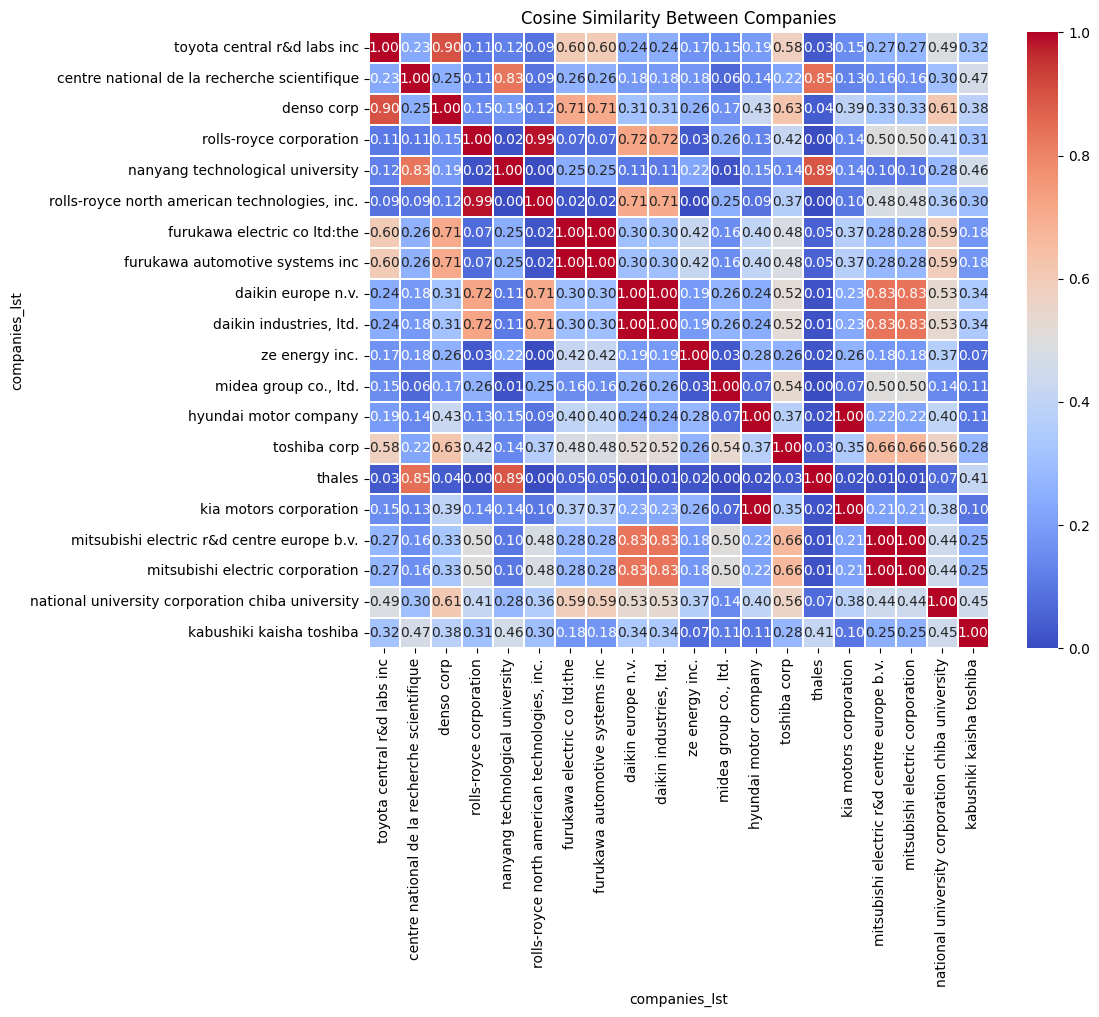

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df.loc[top20_company,top20_company], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.1)
plt.title('Cosine Similarity Between Companies')
plt.show()


In [55]:
top20_similarity_df =similarity_df.loc[top20_company,top20_company]

# 특허 분류 바탕으로 네트워크 그리기


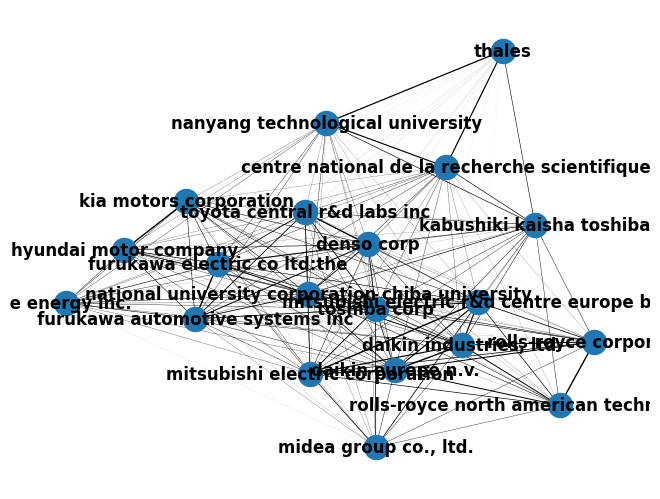

In [57]:


import matplotlib.pyplot as plt
import networkx as nx

# 네트워크 그래프 생성
G = nx.Graph()

# 노드 추가
G.add_nodes_from(top20_similarity_df.index)

# 엣지 및 두께 설정
for i in range(len(top20_similarity_df.index)):
    for j in range(i + 1, len(top20_similarity_df.index)):
        similarity = top20_similarity_df.iloc[i, j]
        if similarity > 0:  # 유사도가 0 이상인 경우에만 엣지 추가
            G.add_edge(top20_similarity_df.index[i], top20_similarity_df.index[j], weight=similarity)

# 두께 계산
widths = [data['weight'] for _, _, data in G.edges(data=True)]

# 네트워크 그리기
pos = nx.spring_layout(G)  # 레이아웃 설정
nx.draw(G, pos, with_labels=True, font_weight='bold', width=widths)

# 그래프 출력
plt.show()


In [61]:
vector_table.loc[top20_company]

ipc_code_front,A01N,A41D,A42B,A47F,A61B,B01D,B01J,B04C,B22F,B23K,...,H01L,H01M,H02J,H02K,H02M,H02N,H02S,H05B,H05K,H10N
companies_lst,,,,,,,,,,,,,,,,,,,,,
toyota central r&d labs inc,0.0,0.0,0.0,0.0,0.0,0.034483,0.006897,0.006897,0.0,0.006897,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
centre national de la recherche scientifique,0.0,0.0,0.0,0.0,0.0,0.000000,0.077586,0.000000,0.0,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
denso corp,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00,0.009524,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
rolls-royce corporation,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
nanyang technological university,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
"rolls-royce north american technologies, inc.",0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
furukawa electric co ltd:the,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
furukawa automotive systems inc,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
daikin europe n.v.,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0


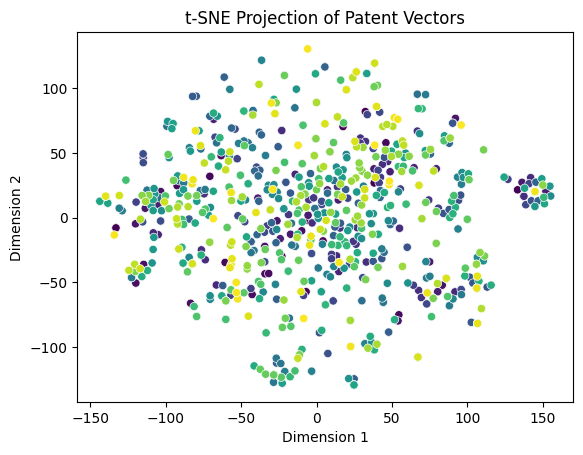

In [64]:
import seaborn as sns
from sklearn.manifold import TSNE

# t-SNE를 사용하여 벡터 값을 2차원에 투영
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(vector_table)

# 투영된 벡터 값을 데이터프레임으로 변환
df_2d = pd.DataFrame(vectors_2d, index=vector_table.index, columns=['Dimension 1', 'Dimension 2'])

# 클러스터링을 위해 Seaborn을 사용하여 플로팅
sns.scatterplot(x='Dimension 1', y='Dimension 2', data=df_2d, hue=df_2d.index, palette='viridis', legend=False)
plt.title('t-SNE Projection of Patent Vectors')
plt.show()

c:\Users\Ksunwoo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


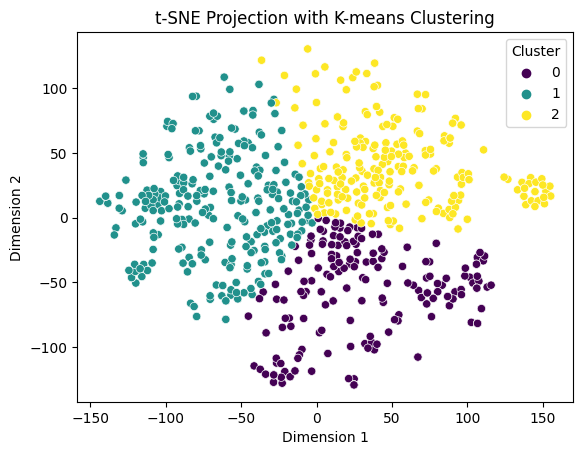

In [65]:
from sklearn.cluster import KMeans

# K-means 클러스터링을 적용
num_clusters = 3  # 클러스터의 개수를 조정할 수 있습니다.
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_2d['Cluster'] = kmeans.fit_predict(vectors_2d)

# 클러스터링 결과 시각화
sns.scatterplot(x='Dimension 1', y='Dimension 2', data=df_2d, hue='Cluster', palette='viridis', legend='full')
plt.title('t-SNE Projection with K-means Clustering')
plt.show()


In [68]:
df_2d[df_2d['Dimension 1']>130]

,Dimension 1,Dimension 2,Cluster
companies_lst,,,
aalborg csp a/s,133.286758,21.502811,2
"aldemir, alper",137.501846,16.493290,2
"bernroiter, siegfried",137.501846,16.493290,2
"binici, baris",136.239899,27.302792,2
caldic nederland b.v. (cal),152.108002,20.413052,2
chongqing university,137.501846,16.493290,2
clipsol,141.988922,30.927544,2
commissariat à l'energie atomique et aux energies alternatives,137.501846,16.493290,2
"enea, agencia nazionale per le nuove tecnologie, l' energia e lo sviluppo economico sostenibile",140.889450,26.250593,2


### 공개일 기반 가중치 부여 하여 simmilarity 수정 뽑고 비교 분석하면 될듯. 내일에게 맡긴다.

In [84]:
import datetime
def make_datetime(string):
    return datetime.datetime.strptime(string, '%Y.%m.%d')

In [87]:
df_explode_dropdate= df_explode.dropna(subset=['공개일'])

In [92]:
df_explode_dropdate['year'] = df_explode_dropdate['공개일'].apply(lambda x : make_datetime(x).year)

C:\Users\Ksunwoo\AppData\Local\Temp\ipykernel_8384\2311123470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_explode_dropdate['year'] = df_explode_dropdate['공개일'].apply(lambda x : make_datetime(x).year)


In [111]:
df_explode_dropdate['year_coef'] = df_explode_dropdate['year'].apply(lambda x : weight_function(x))
df_explode_dropdate['year_coef']

C:\Users\Ksunwoo\AppData\Local\Temp\ipykernel_8384\2987641942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_explode_dropdate['year_coef'] = df_explode_dropdate['year'].apply(lambda x : weight_function(x))


14       1.00000
14       1.00000
14       1.00000
14       1.00000
14       1.00000
          ...   
11161    0.28243
11161    0.28243
11161    0.28243
11192    0.28243
11192    0.28243
Name: year_coef, Length: 6135, dtype: float64

In [123]:
df_explode_dropdate['ipc_code_front'] = df_explode_dropdate['ipc_code'].apply(lambda x : x.split('-')[0])

vector_table = df_explode_dropdate.pivot_table(index='companies_lst', columns='ipc_code_front', aggfunc='size', fill_value=0)
sum(vector_table.loc['chongqing university'])

C:\Users\Ksunwoo\AppData\Local\Temp\ipykernel_8384\3076551403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_explode_dropdate['ipc_code_front'] = df_explode_dropdate['ipc_code'].apply(lambda x : x.split('-')[0])


1

In [126]:
df_explode_dropdate['ipc_code_front'] = df_explode_dropdate['ipc_code'].apply(lambda x : x.split('-')[0])

weighted_vector_table = df_explode_dropdate.pivot_table(index='companies_lst', columns='ipc_code_front',values='year_coef', aggfunc='sum', fill_value=0)
weighted_vector_table = weighted_vector_table.div(weighted_vector_table.sum(axis=1), axis=0)

# 코사인 유사도 계산
weighted_similarity_matrix = cosine_similarity(weighted_vector_table)

# 결과 데이터프레임 생성
weighted_similarity_df = pd.DataFrame(weighted_similarity_matrix, index=weighted_vector_table.index, columns=weighted_vector_table.index)

# 결과 출력

weighted_similarity_df


C:\Users\Ksunwoo\AppData\Local\Temp\ipykernel_8384\1078942396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_explode_dropdate['ipc_code_front'] = df_explode_dropdate['ipc_code'].apply(lambda x : x.split('-')[0])


companies_lst,oy,"aac acoustic technologies (shenzhen) co., ltd.","aac technologies (nanjing) co., ltd.",aalborg csp a/s,abengoa solar llc,academia sinica,act interior kk,"agency for science, technology and research","agenzia nazionale per le nuove tecnologie, l'energia e lo sviluppo economico sostenibile (enea)","ahola, jero",...,yokohama rubber co ltd:the,"york (wuxi) air conditioning and refrigeration co., ltd.",ze energy inc.,zehnder group international ag,zeon corporation,zhejiang university,"zhen ding technology co., ltd.","ziegler, klausdieter","ziegler, maximilian",zilinská univerzita v ziline
companies_lst,,,,,,,,,,,,,,,,,,,,,
oy,1.000000,0.0,0.0,0.333333,0.000000,0.0,0.0,0.219981,0.131607,0.235702,...,0.0,0.534522,0.423078,0.0,0.0,0.0,0.0,0.833333,0.833333,0.534311
"aac acoustic technologies (shenzhen) co., ltd.",0.000000,1.0,1.0,0.000000,0.000000,0.0,0.0,0.078134,0.000000,0.000000,...,0.5,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
"aac technologies (nanjing) co., ltd.",0.000000,1.0,1.0,0.000000,0.000000,0.0,0.0,0.078134,0.000000,0.000000,...,0.5,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
aalborg csp a/s,0.333333,0.0,0.0,1.000000,0.000000,0.0,0.0,0.438947,0.000000,0.235702,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.500000,0.500000,0.843649
abengoa solar llc,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.219186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zhejiang university,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000
"zhen ding technology co., ltd.",0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000
"ziegler, klausdieter",0.833333,0.0,0.0,0.500000,0.000000,0.0,0.0,0.274722,0.098706,0.235702,...,0.0,0.400892,0.317309,0.0,0.0,0.0,0.0,1.000000,1.000000,0.611646


In [107]:
df_explode_dropdate.pivot_table(index='companies_lst', columns='ipc_code_front', aggfunc = 'sum',fill_value=0)

F-Term                          \
ipc_code_front                                   A01N  A41D  A42B  A47F  A61B   
companies_lst                                                                   
 oy                                                 0     0     0     0     0   
aac acoustic technologies (shenzhen) co., ltd.      0     0     0     0     0   
aac technologies (nanjing) co., ltd.                0     0     0     0     0   
aalborg csp a/s                                     0     0     0     0     0   
abengoa solar llc                                   0     0     0     0     0   
...                                               ...   ...   ...   ...   ...   
zhejiang university                                 0     0     0     0     0   
zhen ding technology co., ltd.                      0     0     0     0     0   
ziegler, klausdieter                                0     0     0     0     0   
ziegler, maximilian                                 0     0     0     0     0   
zilinská univerzita v ziline                        0     0     0     0     0   

                                                                              \
ipc_code_front                                  B01D  B01J  B04C  B22F  B23K   
companies_lst                                                                  
 oy                                                0     0     0     0     0   
aac acoustic technologies (shenzhen) co., ltd.     0     0     0     0     0   
aac technologies (nanjing) co., ltd.               0     0     0     0     0   
aalborg csp a/s                                    0     0     0     0     0   
abengoa solar llc                                  0     0     0     0     0   
...                                              ...   ...   ...   ...   ...   
zhejiang university                                0     0     0     0     0   
zhen ding technology co., ltd.                     0     0     0     0     0   
ziegler, klausdieter                               0     0     0     0     0   
ziegler, maximilian                                0     0     0     0     0   
zilinská univerzita v ziline                       0     0     0     0     0   

                                                ... 현재소유자                      \
ipc_code_front                                  ...  H01L H01M H02J H02K H02M   
companies_lst                                   ...                             
 oy                                             ...     0    0    0    0    0   
aac acoustic technologies (shenzhen) co., ltd.  ...     0    0    0    0    0   
aac technologies (nanjing) co., ltd.            ...     0    0    0    0    0   
aalborg csp a/s                                 ...     0    0    0    0    0   
abengoa solar llc                               ...     0    0    0    0    0   
...                                             ...   ...  ...  ...  ...  ...   
zhejiang university                             ...     0    0    0    0    0   
zhen ding technology co., ltd.                  ...     0    0    0    0    0   
ziegler, klausdieter                            ...     0    0    0    0    0   
ziegler, maximilian                             ...     0    0    0    0    0   
zilinská univerzita v ziline                    ...     0    0    0    0    0   

                                                                         
ipc_code_front                                 H02N H02S H05B H05K H10N  
companies_lst                                                            
 oy                                               0    0    0    0    0  
aac acoustic technologies (shenzhen) co., ltd.    0    0    0    0    0  
aac technologies (nanjing) co., ltd.              0    0    0    0    0  
aalborg csp a/s                                   0    0    0    0    0  
abengoa solar llc                                 0    0    0    0    0  
...                                             ...  ...  ...  .

In [104]:
import numpy as np
df_explode_dropdate['ipc_code_front'] = df_explode_dropdate['ipc_code'].apply(lambda x: x.split('-')[0])

def weight_function(year, current_year =2023):
    weight = 0.9 ** (current_year - year)
    return weight

# 'year' 열을 기반으로 가중치를 부여하여 벡터 생성
weighted_vector_table = df_explode_dropdate.pivot_table(index='companies_lst', columns='ipc_code_front', aggfunc=lambda x: np.sum(x * weight_function(x)), fill_value=0)

# 벡터 정규화
weighted_vector_table = weighted_vector_table.div(weighted_vector_table.sum(axis=1), axis=0)

# 코사인 유사도 계산
weighted_similarity_matrix = cosine_similarity(weighted_vector_table)

# 결과 데이터프레임 생성
weighted_similarity_df = pd.DataFrame(weighted_similarity_matrix, index=weighted_vector_table.index, columns=weighted_vector_table.index)

# 결과 출력
weighted_similarity_df


C:\Users\Ksunwoo\AppData\Local\Temp\ipykernel_8384\1085135177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_explode_dropdate['ipc_code_front'] = df_explode_dropdate['ipc_code'].apply(lambda x: x.split('-')[0])


TypeError: unsupported operand type(s) for -: 'int' and 'str'

In [103]:
similarity_df

companies_lst,oy,"aac acoustic technologies (shenzhen) co., ltd.","aac technologies (nanjing) co., ltd.",aalborg csp a/s,abengoa solar llc,academia sinica,act interior kk,"agency for science, technology and research","agenzia nazionale per le nuove tecnologie, l'energia e lo sviluppo economico sostenibile (enea)","ahola, jero",...,yokohama rubber co ltd:the,"york (wuxi) air conditioning and refrigeration co., ltd.",ze energy inc.,zehnder group international ag,zeon corporation,zhejiang university,"zhen ding technology co., ltd.","ziegler, klausdieter","ziegler, maximilian",zilinská univerzita v ziline
companies_lst,,,,,,,,,,,,,,,,,,,,,
oy,1.000000,0.0,0.0,0.333333,0.000000,0.0,0.0,0.278019,0.125988,0.235702,...,0.0,0.534522,0.419927,0.0,0.0,0.0,0.0,0.833333,0.833333,0.544331
"aac acoustic technologies (shenzhen) co., ltd.",0.000000,1.0,1.0,0.000000,0.000000,0.0,0.0,0.147442,0.000000,0.000000,...,0.5,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
"aac technologies (nanjing) co., ltd.",0.000000,1.0,1.0,0.000000,0.000000,0.0,0.0,0.147442,0.000000,0.000000,...,0.5,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
aalborg csp a/s,0.333333,0.0,0.0,1.000000,0.000000,0.0,0.0,0.417029,0.000000,0.235702,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.500000,0.500000,0.816497
abengoa solar llc,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.235702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zhejiang university,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000
"zhen ding technology co., ltd.",0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000
"ziegler, klausdieter",0.833333,0.0,0.0,0.500000,0.000000,0.0,0.0,0.312772,0.094491,0.235702,...,0.0,0.400892,0.314945,0.0,0.0,0.0,0.0,1.000000,1.000000,0.612372
